# **AER850 Project 3 - YOLOv11**

# *STEP 1*

Object masking is a crucial tool in computer vision, as it enables machines to precisely identify and isolate specific objects within images, fostering enhanced image understanding. OpenCV tools are essential for working with image processing. There are a few steps required to do this efficiently.

• Thresholding in image processing is a technique used to segment an image into regions based on pixel intensity. This can be done using the threshold function in OpenCV.

• Edge detection can be done with two methods:

– Corner detectors are algorithms in computer vision that identify and locate points in an image where there is a significant change in intensity or color. Types of corner detectors include Canny or Harris.

– Contour detection is a computer vision technique that involves identifying and tracing the boundaries of objects within an image, highlighting the regions where there are significant changes in intensity, color, or texture.

• The area of the contour or the size of the line can be used to filter out smaller lines or small contours.

• Once a contour is made and a mask is extracted, the cv2.bitwise_and() operator can be used to extract the PCB from the background.

In [1]:
# Import Libraries
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

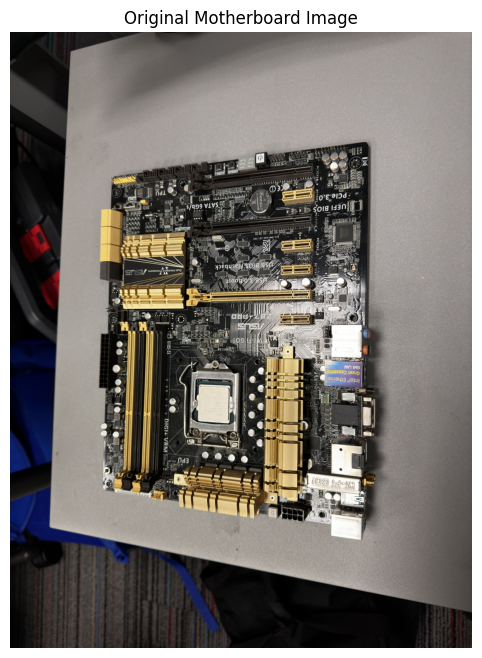

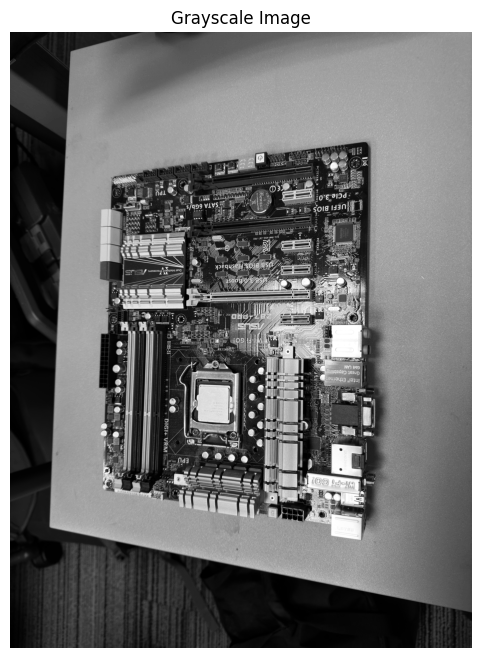

In [2]:
# Set path to read motherboard image
image_dir = "/kaggle/input/aer850-project-3-data/Project 3 Data/motherboard_image.JPEG"

# Read image with OpenCV in BGR Format and convert to RGB
image_BGR = cv2.imread(image_dir,cv2.IMREAD_COLOR)
image_RGB = cv2.cvtColor(image_BGR,cv2.COLOR_BGR2RGB)

# Display Original Image
plt.figure(figsize=(8,8))
plt.imshow(image_RGB)
plt.title("Original Motherboard Image")
plt.axis("off")
plt.show()

# Convert BGR Format to Grayscale and Display
image_GRAY = cv2.cvtColor(image_BGR,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(image_GRAY,cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

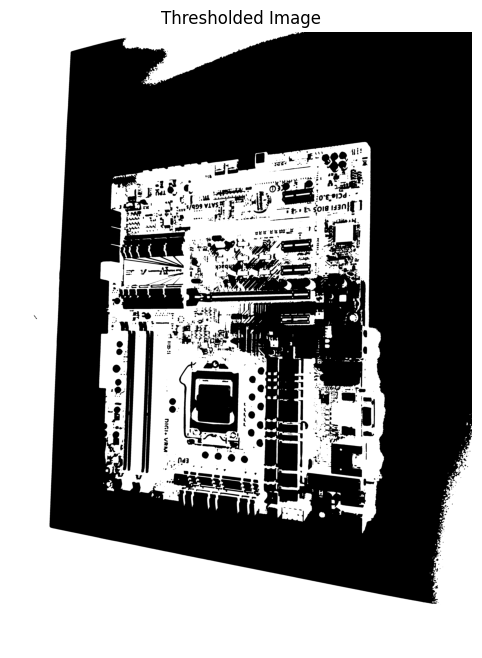

In [3]:
# Apply Thresholding
image_BLUR = cv2.GaussianBlur(image_GRAY,(21,21),0)
_, image_THRESH = cv2.threshold(image_BLUR,127,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.figure(figsize=(8,8))
plt.imshow(image_THRESH,cmap='gray')
plt.title("Thresholded Image")
plt.axis("off")
plt.show()

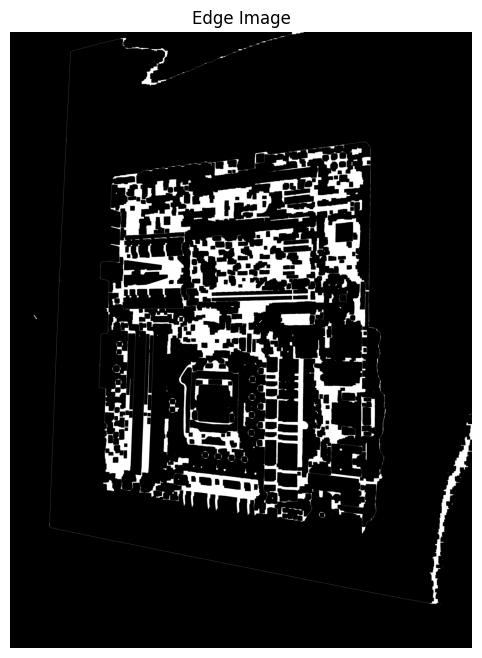

In [4]:
# Detect Edges
canny_edges = cv2.Canny(image_THRESH,50,150)

# Fill gaps in edges
kernel = np.ones((31,31),np.uint8)
closed_edges = cv2.morphologyEx(canny_edges,cv2.MORPH_CLOSE,kernel)

plt.figure(figsize=(8,8))
plt.imshow(closed_edges,cmap='gray')
plt.title("Edge Image")
plt.axis("off")
plt.show()

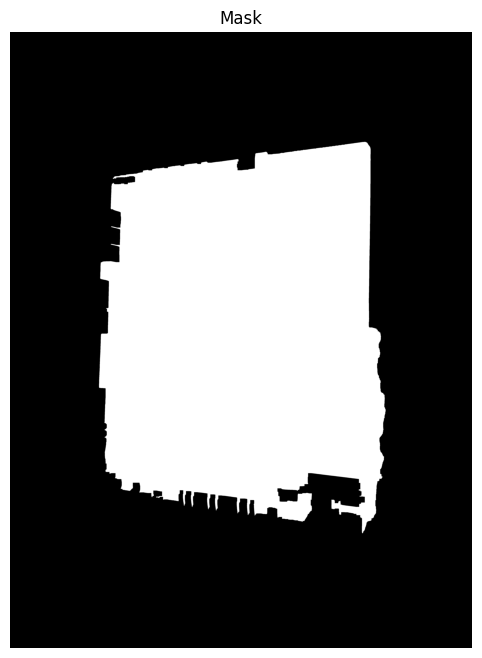

In [5]:
# Find contours
contours, _ = cv2.findContours(closed_edges,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

# Find largest contour
largest_contour = max(contours, key=cv2.contourArea)

# Create a blank mask
mask = np.zeros_like(image_GRAY)

# Draw contours on the mask
cv2.drawContours(mask,[largest_contour],-1,255,thickness=cv2.FILLED)

# Show mask
plt.figure(figsize=(8,8))
plt.imshow(mask,cmap='gray')
plt.title("Mask")
plt.axis("off")
plt.show()

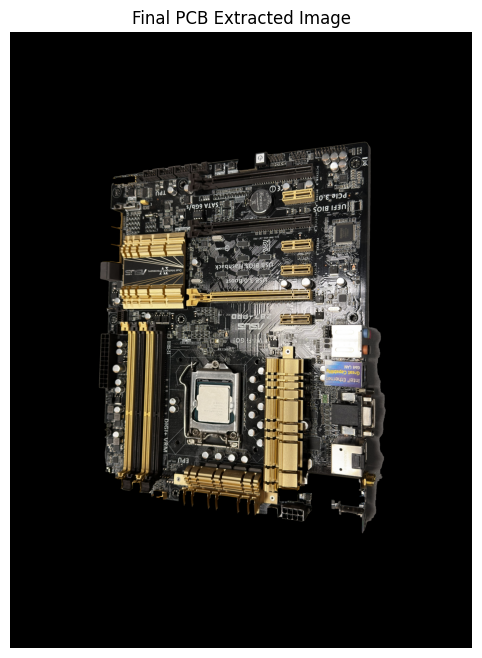

In [6]:
# Apply mask back to original image
image_MASKED = cv2.bitwise_and(image_RGB,image_RGB,mask=mask)

plt.figure(figsize=(8,8))
plt.imshow(image_MASKED,cmap='gray')
plt.title("Final PCB Extracted Image")
plt.axis("off")
plt.show()